# Mental Health and the Workplace

Dataset Description: The dataset contains information about individuals' lifestyle and professional attributes. The goal is to analyze and predict the likelihood of depression based on factors such as sleep duration, occupation, age, gender, and education level. This project aims to better understand the mental health risks present in today's work environments and support early prevention through data-driven insights.

+ KAGGLE: https://www.kaggle.com/competitions/playground-series-s4e11  
+ GITHUB: https://github.com/Elvis-Jekir/mental-health-project  

**Columns in the Dataset:**

+ id (Type: int) - Unique identifier for each survey respondent.
+ Name (Type: string) - Name of the respondent (may be anonymized).
+ Gender (Type: string) - Gender identity of the respondent.
+ Age (Type: int) - Age of the respondent.
+ City (Type: string) - City where the respondent resides.
+ Working Professional or Student (Type: string) - Indicates if the person is a student or working professional.
+ Profession (Type: string) - Field or area of current profession/study.
+ Academic Pressure (Type: float) - Self-reported level of academic pressure.
+ Work Pressure (Type: float) - Self-reported level of pressure from work.
+ CGPA (Type: float) - Cumulative Grade Point Average (for students).
+ Study Satisfaction (Type: float) - Satisfaction level with current studies.
+ Job Satisfaction (Type: float) - Satisfaction level with current job.
+ Sleep Duration (Type: float, hours) - Average hours of sleep per night.
+ Dietary Habits (Type: string) - Description of dietary habits (e.g., healthy, unhealthy).
+ Degree (Type: string) - Current or highest educational degree.
+ Have you ever had suicidal thoughts ? (Type: string) - Indicates whether the respondent has experienced suicidal thoughts.
+ Work/Study Hours (Type: float, hours/day) - Average number of work or study hours per day.
+ Financial Stress (Type: float) - Self-rated level of financial stress.
+ Family History of Mental Illness (Type: string) - Indicates if mental illness is present in family history.
+ **Depression (Type: int, binary) - Target variable indicating if the respondent is experiencing depression (1 = Yes, 0 = No).**


entao working professional es binary e o profession se for estudante pode ser estudante a profissao ou pode ta zerado nan por conta disso... 

In [22]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [23]:
# Read data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [42]:
train_df['Study Satisfaction'].value_counts(dropna=False)

Study Satisfaction
NaN    112803
4.0      6360
2.0      5840
3.0      5823
1.0      5451
5.0      4423
Name: count, dtype: int64

# Exploratory Data Analysis

In [31]:
# visualizing train set
train_df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [37]:
train_df['Dietary Habits'].unique()


array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [5]:
# Visualizing test set
test_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [4]:
# Columns from tain 
train_df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [5]:
# Checking types, features and count 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

**Sleep Duration** is currently stored as an object, but it should be numeric.

In [6]:
# Checking general stats from train 
train_df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [7]:
# Separate numeric and categorical columns
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

Numerical Columns:
['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']


### Check Duplicate rows

In [8]:
train_df.duplicated().sum()

np.int64(0)

In [9]:
test_df.duplicated().sum()

np.int64(0)

+ There are no duplicate rows in both dataset

### Check Missing values

In [10]:
missing = train_df.isnull().sum()[train_df.isnull().sum() > 0]
print("Missing values in train:\n", missing)

Missing values in train:
 Profession             36630
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Dietary Habits             4
Degree                     2
Financial Stress           4
dtype: int64


In [11]:
missing = test_df.isnull().sum()[test_df.isnull().sum() > 0]
print("Missing values in test:\n", missing)

Missing values in test:
 Profession            24632
Academic Pressure     75033
Work Pressure         18778
CGPA                  75034
Study Satisfaction    75033
Job Satisfaction      18774
Dietary Habits            5
Degree                    2
dtype: int64


In the training dataset, the columns with missing values are: `Profession` (36,630 missing), `Academic Pressure` (112,803), `Work Pressure` (27,918), `CGPA` (112,802), `Study Satisfaction` (112,803), `Job Satisfaction` (27,910), `Dietary Habits` (4), `Degree` (2), and `Financial Stress` (4). The test dataset shows a similar pattern: `Profession` (24,632), `Academic Pressure` (75,033), `Work Pressure` (18,778), `CGPA` (75,034), `Study Satisfaction` (75,033), `Job Satisfaction` (18,774), `Dietary Habits` (5), and `Degree` (2). The highest missing rates are observed in `Academic Pressure`, `CGPA`, and `Study Satisfaction`, which may require deeper analysis — depending on their importance, they could be dropped or imputed using advanced methods like group-based mean or predictive modeling. Moderate missingness in `Work Pressure`, `Job Satisfaction`, and `Profession` can potentially be handled with simpler imputation strategies (e.g., mode or median). Columns like `Dietary Habits`, `Degree`, and `Financial Stress` have very few missing values and can likely be filled with the most frequent value. At this stage, no data cleaning or transformation has been applied — the focus is still on understanding the missing data patterns before deciding on the best imputation strategies.


### Visualizations

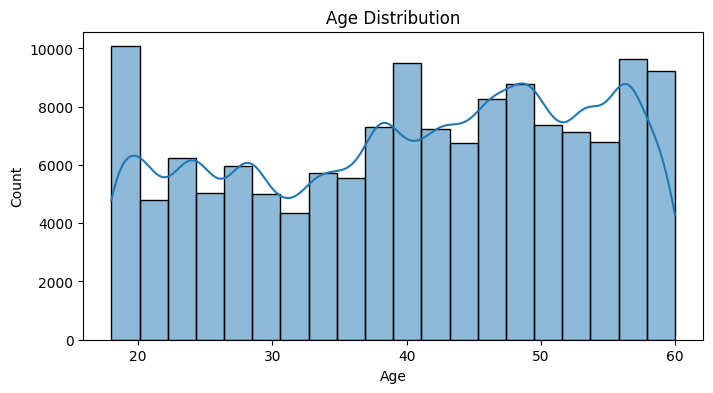

In [50]:
# Distribution by age
plt.figure(figsize=(8, 4))
sns.histplot(train_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

The age distribution is relatively balanced, with the highest concentrations around ages 18, 40, and 58.

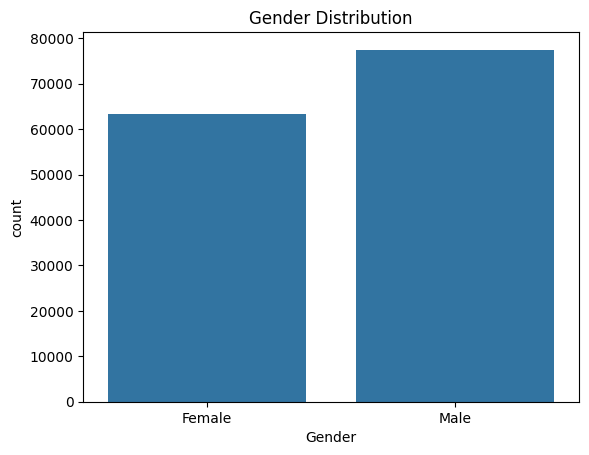

In [51]:
# By Genre
sns.countplot(data=train_df, x='Gender')
plt.title('Gender Distribution')
plt.show()

There are more males than females in the dataset, with males representing the majority.

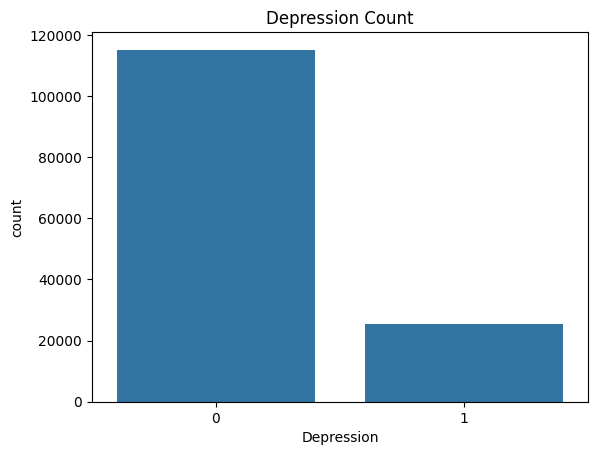

In [52]:
# Depression Count
sns.countplot(data=train_df, x='Depression')
plt.title('Depression Count')
plt.show()

The majority of participants do not show signs of depression, while a noticeable portion is classified as depressed.

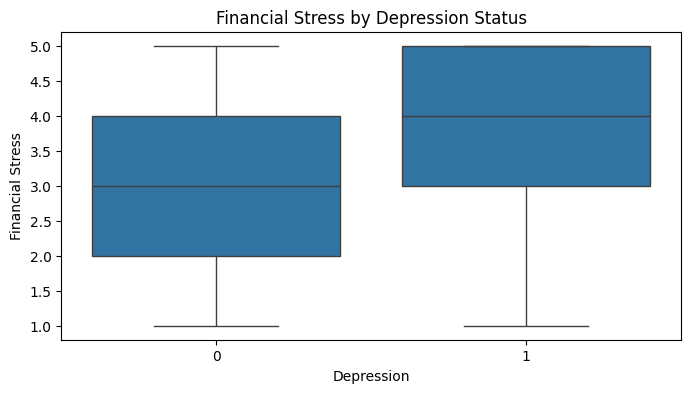

In [55]:
#Financial Stress by Depression Status
plt.figure(figsize=(8, 4))
sns.boxplot(data=train_df, x='Depression', y='Financial Stress')
plt.title('Financial Stress by Depression Status')
plt.show()

Participants classified with depression (1) tend to report higher levels of financial stress compared to those without depression (0), as shown by the higher median and upper quartile in the boxplot. This suggests that higher financial stress is commonly observed among participants with depression.

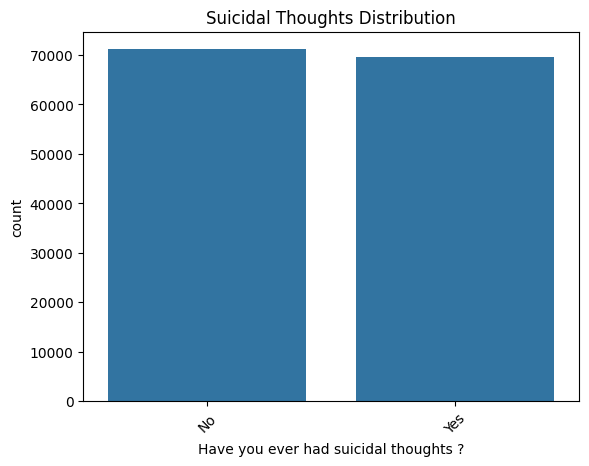

In [16]:
# Suicidal thoughts
sns.countplot(x='Have you ever had suicidal thoughts ?', data=train_df)
plt.title('Suicidal Thoughts Distribution')
plt.xticks(rotation=45)
plt.show()


The distribution of responses to suicidal thoughts is nearly balanced, with a slightly higher number of participants reporting "No" compared to "Yes". This indicates that a significant portion of individuals in the dataset have experienced suicidal thoughts.

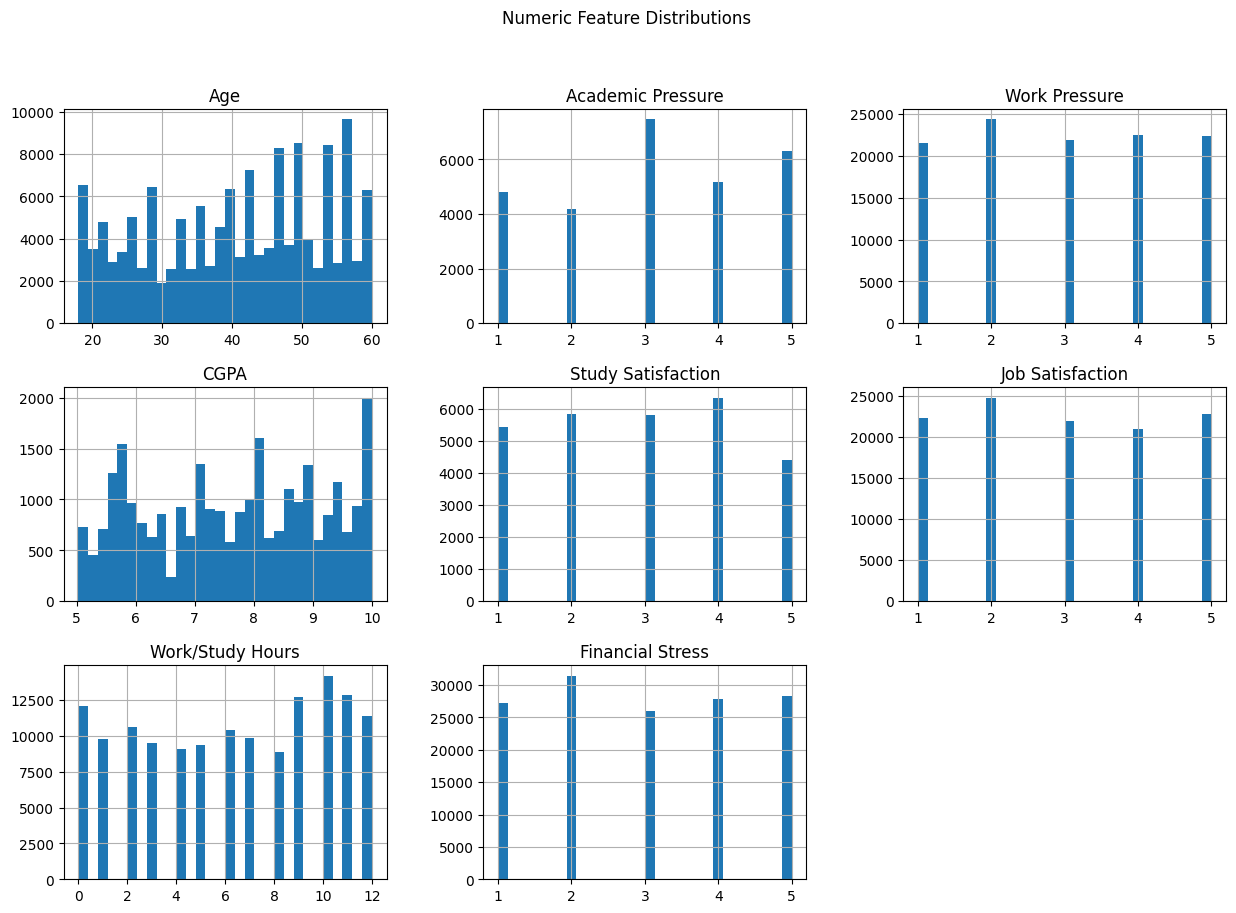

In [17]:
numeric_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
                'Work/Study Hours', 'Financial Stress']

train_df[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle('Numeric Feature Distributions')
plt.show()


## General Insights from Numeric Features


* **High academic pressure** is common, yet many still report moderate to high study satisfaction — suggesting some handle stress better.
* **Work pressure** is evenly spread, but **job satisfaction** varies more, indicating other factors may influence workplace well-being.
* **CGPA is high for many**, especially around 9–10, possibly reflecting high-achieving students under pressure.
* **Financial stress** shows a split — many feel very stressed, while others feel little to no pressure.
* **Work/study hours peak at 10–12 hours**, suggesting long daily routines that may contribute to burnout.
* **Age** is well distributed, with more participants in early adulthood and near retirement.

Overall, signs of **high workload and pressure** are frequent, especially in those reporting **depression or stress-related symptoms**.


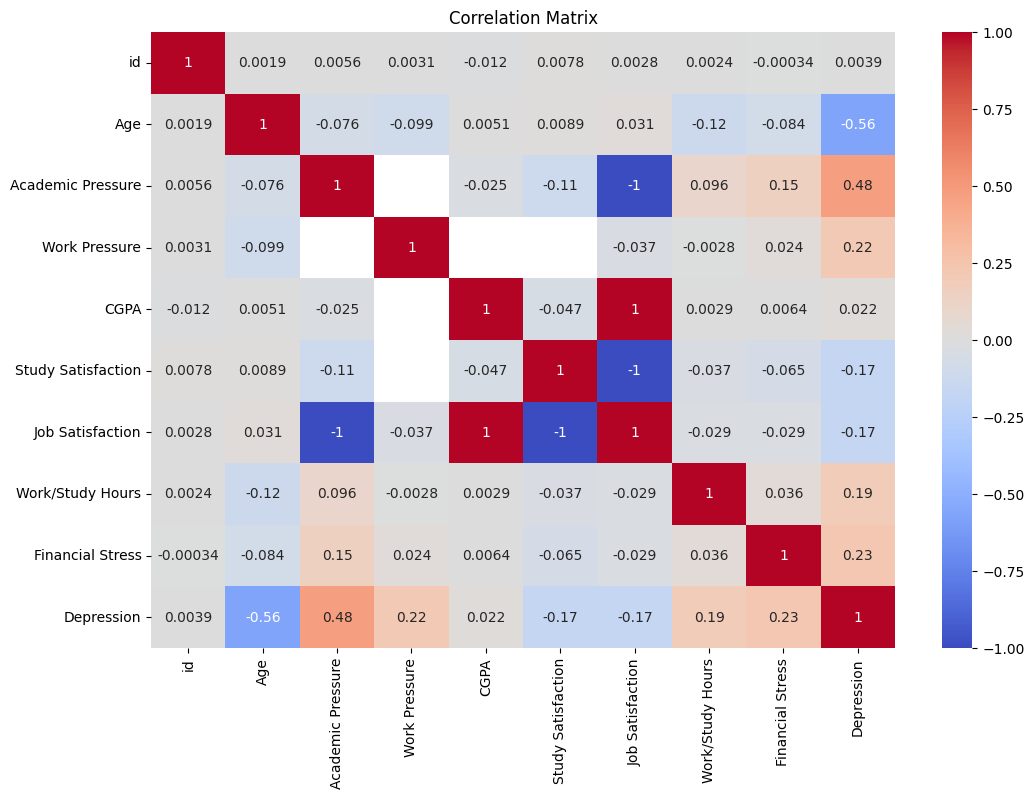

In [14]:
# Only numerical columns
num_cols = train_df.select_dtypes(include='number')

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


* **Depression** is **positively correlated** with:

  * **Academic Pressure** (0.48)
  * **Work Pressure** (0.22)
  * **Financial Stress** (0.23)
  * **Work/Study Hours** (0.19)
    → These factors appear to increase alongside depression levels.

* **Depression** is **negatively correlated** with:

  * **Age** (–0.56) — suggesting younger individuals are more affected.
  * **Study Satisfaction** and **Job Satisfaction** (–0.17 each) — less satisfaction is linked to more depression.

Overall: Depression is strongly linked to **pressure and stress**, while **satisfaction** and **age** may play a protective role.
